In [2]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11480\3305069133.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## A. 데이터 전처리 - 데이터 읽어오기
- Pandas 를 사용하여 넷플릭스 파일을 데이터 프레임으로 읽어옵니다.
- 이때, Date, Open, High, Low, Close 필드만 읽어오도록 구성

In [3]:
# CSV 파일 경로
csv_path = "NFLX.csv"

# CSV 파일 읽어오기
df = pd.read_csv(csv_path, usecols=range(0, 5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기
- csv 파일을 데이터 프레임으로 읽어와서 2021 이후의 데이터만 필터링
  - 필터링이 가능한 형식으로 데이터 타입 변경 후 필터링 진행
  - Pandas의 to_datetime() 활용
- 필터링이 완료된 데이터프레임의 종가 데이터를 Matplotlib 사용해서 시각화

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11480\2164160323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])


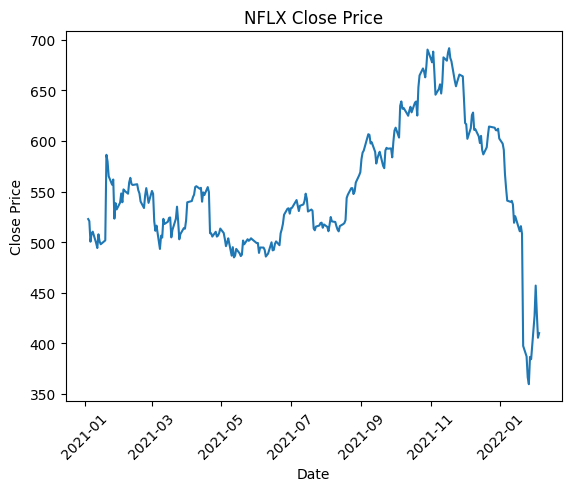

In [4]:
# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
new_df = pd.read_csv(csv_path, usecols=range(0, 5))

# 2022년 이후 데이터 필터링
df_after_2021 = new_df[new_df["Date"] >= "2021-01-01"]

# 날짜 데이터 변환
df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_after_2021['Date'], df_after_2021['Close'])


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# x 축 설정(회전시키기) -> 라벨 돌리기
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

## C. 데이터 분석 - 2021 년 이후 최고, 최저 종가 출력하기
- csv 파일을 데이터 프레임으로 읽어와 2021 년 이후의 데이터만 필터링한다.
- 종가(Close) 필드를 활용하여 2021 년 이후 가장 높은 종가와 가장 낮은 종가 출력
- Pandas의 내장 함수 사용

In [5]:
max_price = (df_after_2021['Close']).max()
min_price = (df_after_2021['Close']).min()

print('최고 종가: ', max_price)
print('최저 종가: ', min_price)

최고 종가:  691.690002
최저 종가:  359.700012


## D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기
- csv 파일을 DataFrame으로 읽어와 2021 년 이후의 데이터만 필터링 합니다.
- 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame을 만들어 그래프로 시각화

In [6]:
# average_month = df_after_2021.groupby(df_after_2021['month']).mean()
# average_month
# 왜이래

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11480\976042798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11480\976042798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['month'] = df_after_2021['Date'].dt.month


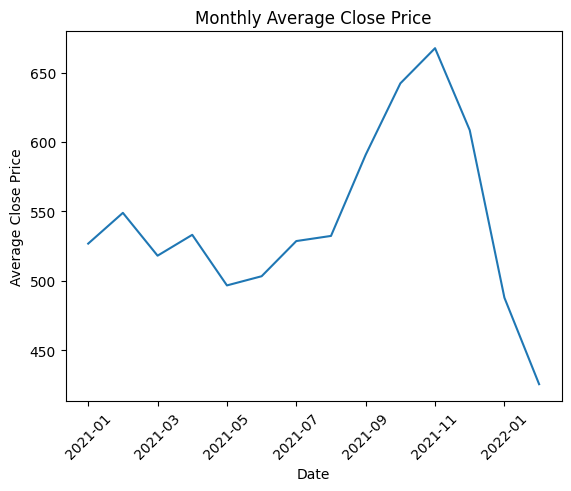

In [7]:
df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])

# Month 추가
df_after_2021['month'] = df_after_2021['Date'].dt.month

# 월별로 평균내기
average_month = df_after_2021.groupby(df_after_2021['Date'].dt.to_period('M'))['Close'].mean()

# 인덱스 설정
average_month = pd.DataFrame({'month': average_month.index, 'Mean': average_month.values})

# 문자열로 변환
average_month['month'] = average_month['month'].astype(str)


# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(average_month['month'], average_month['Mean'])


# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# x 축 설정(회전시키기) -> 라벨 돌리기
plt.xticks(rotation=45)

# 눈금 크기
plt.xticks(np.arange(0, 13, 2))

# 그래프 표시
plt.show()



## E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기
- csv 파일을 DataFrame으로 읽어와 2022년 이후의 데이터만 필터링합니다.
- Matplottilb를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 시각화

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11480\635543271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2022["Date"] = pd.to_datetime(df_after_2022["Date"])


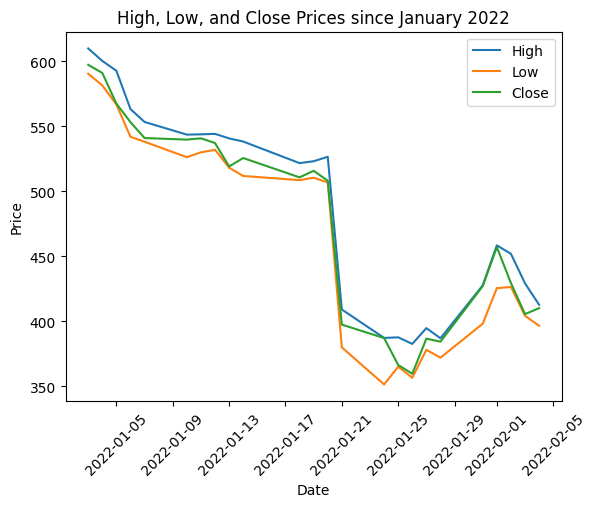

In [9]:
# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(0, 5))


# 2022년 이후 데이터 필터링
df_after_2022 = df[new_df["Date"] >= "2022-01-01"]
df_after_2022["Date"] = pd.to_datetime(df_after_2022["Date"])

# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low, and Close Prices since January 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 눈금 크기
plt.xticks()

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()
